In [1]:
import pandas as pd

fix_file = "dataset/fix_data.csv"
fix_df = pd.read_csv(fix_file)
fix_df

,qid,question_text,target
0,42b9446db515fcd253a7,What is the qualification for an animator or a...,0
1,bdad704204f8535e313a,Do different flavoured protein shakes have dif...,0
2,d13a0c498bf5a9cb2bc3,How does someone keep their children when they...,0
3,237828efb8348c39f14b,How much time required to learn Bollywood danc...,0
4,3c02e808603faa6ecc20,What skills can I have to fit in formulae one?,0
...,...,...,...
3995,8e636f1fb48158100adc,"In ancient China, there was nothing other than...",1
3996,bffed8f6e8fec61187b5,"I have a 3 inch penis, can I fuck a lot's girls?",1
3997,324670fdf6a9ba5cc019,Are all blacks from Haiti?,1
3998,e74c62301253bbc32563,Why are questions demonizing Israel okay but a...,1


[Text(0, 0, 'sincere'), Text(1, 0, 'insincere')]

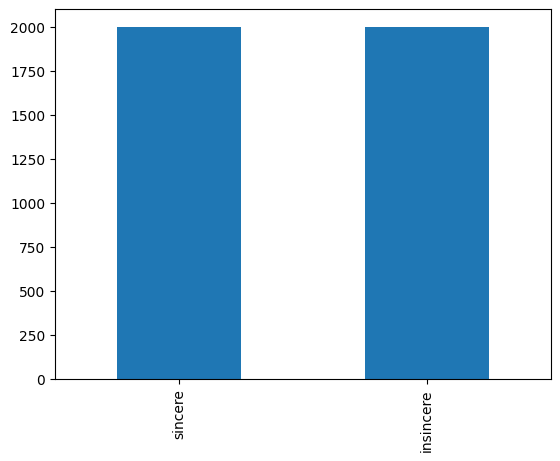

In [2]:
import matplotlib.pyplot as plt

raw_plot = fix_df.target.value_counts().plot(kind='bar')
raw_plot.set_xticklabels(["sincere", "insincere"])

In [3]:
from preprocessing import preprocessing_text_with_stemming
import numpy as np

fix_df['preprocessed_text'] = fix_df['question_text'].apply(preprocessing_text_with_stemming)

In [4]:
X = fix_df['preprocessed_text'].apply(lambda x: ' '.join(x))
y = fix_df['target']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_test.shape)

(3600,)
(400,)


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(3600, 6212)
(400, 6212)


In [7]:
# import pickle
# f = open('tfidf_vectorizer.pickle', 'wb')
# pickle.dump(tfidf, f)
# f.close()

In [8]:
from MultinomialNB import MultinomialNaiveBayes
mnb = MultinomialNaiveBayes()
mnb.fit(X_train_tfidf.toarray(), y_train)
y_pred = mnb.predict(X_test_tfidf.toarray())

In [9]:
# import pickle
# w = open('mnb_classifier.pickle', 'wb')
# pickle.dump(mnb, w)
# w.close()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Sincere', 'Insincere']))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[140  66]
 [  7 187]]

Classification Report:
              precision    recall  f1-score   support

     Sincere       0.95      0.68      0.79       206
   Insincere       0.74      0.96      0.84       194

    accuracy                           0.82       400
   macro avg       0.85      0.82      0.81       400
weighted avg       0.85      0.82      0.81       400


Accuracy: 0.82


In [18]:
from tkinter import *
from preprocessing import preprocessing_text_with_stemming

w = Tk()
def center_window(window, width, height):
    screen_width = window.winfo_screenwidth()
    screen_height = window.winfo_screenheight()

    x = (screen_width - width) // 2
    y = (screen_height - height) // 2

    window.geometry(f'{width}x{height}+{x}+{y}')

window_width = 400
window_height = 400

center_window(w, window_width, window_height)

w.geometry('400x200')
w.title("Insincere Question Detection")

Label(w, text="Insincere Question Detection", font=("TkDefaultFont", 14, "bold")).pack()

def predict():
    text = entry.get()
    preprocessed_text = preprocessing_text_with_stemming(text)
    transformed_input = tfidf.transform([' '.join(preprocessed_text)])
    predicted_class = mnb.predict(transformed_input.toarray())[0]
    label = "Sincere" if predicted_class == 0 else "Insincere"
    result_label.config(text=f"{label}", font=("TkDefaultFont", 12, "bold"))
    print(transformed_input)

entry = Entry(w, width = 50)
entry.pack()

Button(w, text="Predict", command=predict).pack()
Label(w, text="Predicted Class").pack()
result_label = Label(w, text="0")
result_label.pack()
w.mainloop()

  (0, 4977)	0.44172759787459703
  (0, 4366)	0.44172759787459703
  (0, 2105)	0.4638657040066153
  (0, 1743)	0.32176070080691666
  (0, 1519)	0.5394924639089649
